In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_movies = pd.read_csv('movies.csv')
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
df_ratings = pd.read_csv('ratings.csv')
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [5]:
# Xóa các dòng có giá trị "(no genres listed)" theo số movieId và giữ lại một dòng duy nhất cho mỗi số movieId
df_moviesclean = df_movies[df_movies['genres'] != '(no genres listed)'].drop_duplicates(subset='movieId', keep='first')

# In ra DataFrame sau khi xóa
print("\nDataFrame sau khi xóa:")
df_moviesclean


DataFrame sau khi xóa:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [7]:
# Sử dụng hàm str.extract để tách "title" thành "title" và "year"
df_moviesclean[['title', 'year']] = df_moviesclean['title'].str.extract(r'([^\(]+)\s*\((\d{4})\)', expand=True)
# Hiển thị DataFrame mới
df_moviesclean[['movieId', 'title', 'year', 'genres']]

,movieId,title,year,genres
0,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,1995,Adventure|Children|Fantasy
2,3,Grumpier Old Men,1995,Comedy|Romance
3,4,Waiting to Exhale,1995,Comedy|Drama|Romance
4,5,Father of the Bride Part II,1995,Comedy
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,2017,Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero,2017,Animation|Comedy|Fantasy
9739,193585,Flint,2017,Drama
9740,193587,Bungo Stray Dogs: Dead Apple,2018,Action|Animation


In [8]:
# Tính toán số lượng cột cần tạo
max_genres_count = df_moviesclean['genres'].str.count('|').max() + 1

# Tạo danh sách cột mới
genres_columns = [f'genres{i+1}' for i in range(max_genres_count)]

# Tạo ra đúng số lượng cột cần thiết với giá trị None
for col in genres_columns:
    df_moviesclean[col] = None

# Thêm giá trị cho từng cột
for i in range(max_genres_count):
    # Kiểm tra nếu chỉ mục vượt quá số lượng cột thực tế
    if i < len(df_moviesclean['genres'].str.split('|', expand=True).columns):
        df_moviesclean[genres_columns[i]] = df_moviesclean['genres'].str.split('|', expand=True).iloc[:, i]

# In ra DataFrame mới
df_moviesclean

,movieId,title,genres,year,genres1,genres2,genres3,genres4,genres5,genres6,...,genres70,genres71,genres72,genres73,genres74,genres75,genres76,genres77,genres78,genres79
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,Adventure,Animation,Children,Comedy,Fantasy,None,...,None,None,None,None,None,None,None,None,None,None
1,2,Jumanji,Adventure|Children|Fantasy,1995,Adventure,Children,Fantasy,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,3,Grumpier Old Men,Comedy|Romance,1995,Comedy,Romance,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,Comedy,Drama,Romance,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,5,Father of the Bride Part II,Comedy,1995,Comedy,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,2017,Action,Animation,Comedy,Fantasy,None,None,...,None,None,None,None,None,None,None,None,None,None
9738,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,2017,Animation,Comedy,Fantasy,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9739,193585,Flint,Drama,2017,Drama,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9740,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,2018,Action,Animation,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [9]:
df_moviesclean = df_moviesclean.dropna(axis=1, how='all')

In [10]:
df_moviesclean[['movieId', 'title', 'year', 'genres1', 'genres2', 'genres3', 'genres4', 'genres5', 'genres6', 'genres7', 'genres8', 'genres9', 'genres10']]

,movieId,title,year,genres1,genres2,genres3,genres4,genres5,genres6,genres7,genres8,genres9,genres10
0,1,Toy Story,1995,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,2,Jumanji,1995,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,3,Grumpier Old Men,1995,Comedy,Romance,None,None,None,None,None,None,None,None
3,4,Waiting to Exhale,1995,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,5,Father of the Bride Part II,1995,Comedy,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,2017,Action,Animation,Comedy,Fantasy,None,None,None,None,None,None
9738,193583,No Game No Life: Zero,2017,Animation,Comedy,Fantasy,None,None,None,None,None,None,None
9739,193585,Flint,2017,Drama,None,None,None,None,None,None,None,None,None
9740,193587,Bungo Stray Dogs: Dead Apple,2018,Action,Animation,None,None,None,None,None,None,None,None


In [11]:
# Xác định các hàng chứa giá trị None
rows_with_none = df_moviesclean.isna().any(axis=1)

# Thay thế giá trị None thành chuỗi rỗng chỉ trong các hàng có giá trị None
df_moviesclean.loc[rows_with_none] = df_moviesclean.loc[rows_with_none].fillna('')

# In ra DataFrame sau khi thực hiện thay thế
df_moviesclean

,movieId,title,genres,year,genres1,genres2,genres3,genres4,genres5,genres6,genres7,genres8,genres9,genres10
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,Adventure,Animation,Children,Comedy,Fantasy,,,,,
1,2,Jumanji,Adventure|Children|Fantasy,1995,Adventure,Children,Fantasy,,,,,,,
2,3,Grumpier Old Men,Comedy|Romance,1995,Comedy,Romance,,,,,,,,
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,Comedy,Drama,Romance,,,,,,,
4,5,Father of the Bride Part II,Comedy,1995,Comedy,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,2017,Action,Animation,Comedy,Fantasy,,,,,,
9738,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,2017,Animation,Comedy,Fantasy,,,,,,,
9739,193585,Flint,Drama,2017,Drama,,,,,,,,,
9740,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,2018,Action,Animation,,,,,,,,


In [12]:
print('Số lượng giá trị movies trùng lặp:', df_moviesclean.duplicated().sum())
      
print('\nSố lượng giá trị movies bị thiếu:', df_moviesclean.isnull().sum().sum())

Số lượng giá trị movies trùng lặp: 0

Số lượng giá trị movies bị thiếu: 0


In [13]:
print('Số lượng giá trị ratings trùng lặp:', df_ratings.duplicated().sum())
      
print('\nSố lượng giá trị ratings bị thiếu:', df_ratings.isnull().sum().sum())

Số lượng giá trị ratings trùng lặp: 0

Số lượng giá trị ratings bị thiếu: 0


In [14]:
import re
def correct_title(title):
    match = re.match(r'^(.*), The \((\d{4})\)$', title)
    if match:
        movies_name = match.group(1)
        year = match.group(2)
        return f'The {movies_name} ({year})'
    else:
        return title

In [15]:
df_moviesclean['title'] = df_moviesclean['title'].apply(correct_title)

/tmp/ipykernel_3069/4031865164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_moviesclean['title'] = df_moviesclean['title'].apply(correct_title)


In [16]:
df_moviesclean.shape

(9708, 14)

In [17]:
df_moviesclean.head(2)

,movieId,title,genres,year,genres1,genres2,genres3,genres4,genres5,genres6,genres7,genres8,genres9,genres10
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,Adventure,Animation,Children,Comedy,Fantasy,,,,,
1,2,Jumanji,Adventure|Children|Fantasy,1995,Adventure,Children,Fantasy,,,,,,,


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


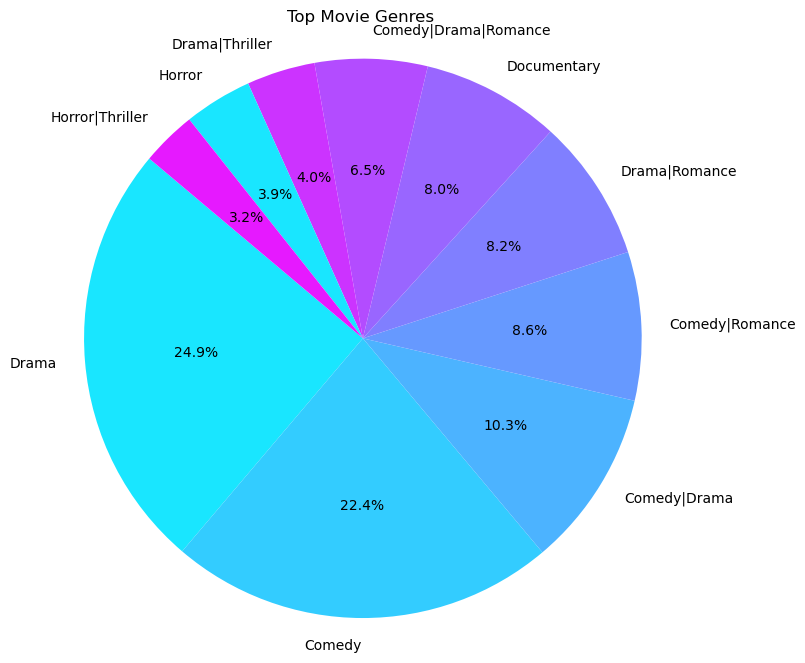

In [18]:
import seaborn as sns
a = plt.cm.cool

top_genres = df_moviesclean['genres'].explode().value_counts().head(10)
colors = [a(0.1), a(0.2), a(0.3), a(0.4), a(0.5), a(0.6), a(0.7), a(0.8), a(0.1), a(0.9), a(0.99),]

plt.figure(figsize=(8, 8))
plt.pie(top_genres.values, labels=top_genres.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Top Movie Genres')
plt.axis('equal')
plt.show()


In [19]:
df_ratings.shape

(100836, 4)

In [20]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [21]:
df_moviesclean.isnull().sum()

movieId     0
title       0
genres      0
year        0
genres1     0
genres2     0
genres3     0
genres4     0
genres5     0
genres6     0
genres7     0
genres8     0
genres9     0
genres10    0
dtype: int64

In [22]:
df_ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [23]:
df_moviesclean.duplicated().sum()

0

In [24]:
df_ratings.duplicated().sum()

0

In [25]:
ratings_with_name = df_ratings.merge(df_moviesclean,on='movieId')

In [26]:
ratings_with_name.shape

(100789, 17)

In [27]:
ratings_with_name[['userId', 'movieId', 'rating', 'timestamp', 'title', 'year', 'genres1', 'genres2', 'genres3', 'genres4', 'genres5', 'genres6', 'genres7', 'genres8', 'genres9', 'genres10']].head()

,userId,movieId,rating,timestamp,title,year,genres1,genres2,genres3,genres4,genres5,genres6,genres7,genres8,genres9,genres10
0,1,1,4.0,964982703,Toy Story,1995,Adventure,Animation,Children,Comedy,Fantasy,,,,,
1,5,1,4.0,847434962,Toy Story,1995,Adventure,Animation,Children,Comedy,Fantasy,,,,,
2,7,1,4.5,1106635946,Toy Story,1995,Adventure,Animation,Children,Comedy,Fantasy,,,,,
3,15,1,2.5,1510577970,Toy Story,1995,Adventure,Animation,Children,Comedy,Fantasy,,,,,
4,17,1,4.5,1305696483,Toy Story,1995,Adventure,Animation,Children,Comedy,Fantasy,,,,,


In [28]:
num_rating_df = ratings_with_name.groupby('title').count()['rating'].reset_index()
num_rating_df.rename(columns={'rating':'num_ratings'},inplace=True)
num_rating_df

,title,num_ratings
0,,8
1,'71,1
2,'A' gai waak),2
3,'A' gai wak juk jap),2
4,'Hellboy': The Seeds of Creation,1
...,...,...
9405,"École de la chair, L')",1
9406,Être et avoir),1
9407,Ôdishon),6
9408,Ônibus 174),3


In [29]:
ratings_with_name['rating'] = pd.to_numeric(ratings_with_name['rating'], errors='coerce')

In [30]:
avg_rating_df = ratings_with_name.groupby('title')['rating'].mean().reset_index()
avg_rating_df.rename(columns={'rating':'avg_ratings'},inplace=True)
avg_rating_df

,title,avg_ratings
0,,3.312500
1,'71,4.000000
2,'A' gai waak),4.000000
3,'A' gai wak juk jap),3.750000
4,'Hellboy': The Seeds of Creation,4.000000
...,...,...
9405,"École de la chair, L')",3.000000
9406,Être et avoir),3.000000
9407,Ôdishon),3.750000
9408,Ônibus 174),3.833333


In [31]:
popular_df = num_rating_df.merge(avg_rating_df, on='title')
popular_df

,title,num_ratings,avg_ratings
0,,8,3.312500
1,'71,1,4.000000
2,'A' gai waak),2,4.000000
3,'A' gai wak juk jap),2,3.750000
4,'Hellboy': The Seeds of Creation,1,4.000000
...,...,...,...
9405,"École de la chair, L')",1,3.000000
9406,Être et avoir),1,3.000000
9407,Ôdishon),6,3.750000
9408,Ônibus 174),3,3.833333


In [32]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_ratings', ascending=False).head(50)

In [33]:
popular_df.merge(df_moviesclean,on='title').drop_duplicates('title').shape

(6, 16)

In [34]:
popular_df

,title,num_ratings,avg_ratings
7288,"Shawshank Redemption, The",317,4.429022
7686,Star Wars: Episode IV - A New Hope,251,4.231076
6596,Pulp Fiction,307,4.197068
5292,"Matrix, The",278,4.192446
2972,Forrest Gump,329,4.164134
7374,"Silence of the Lambs, The",279,4.161290


<function matplotlib.pyplot.show(close=None, block=None)>

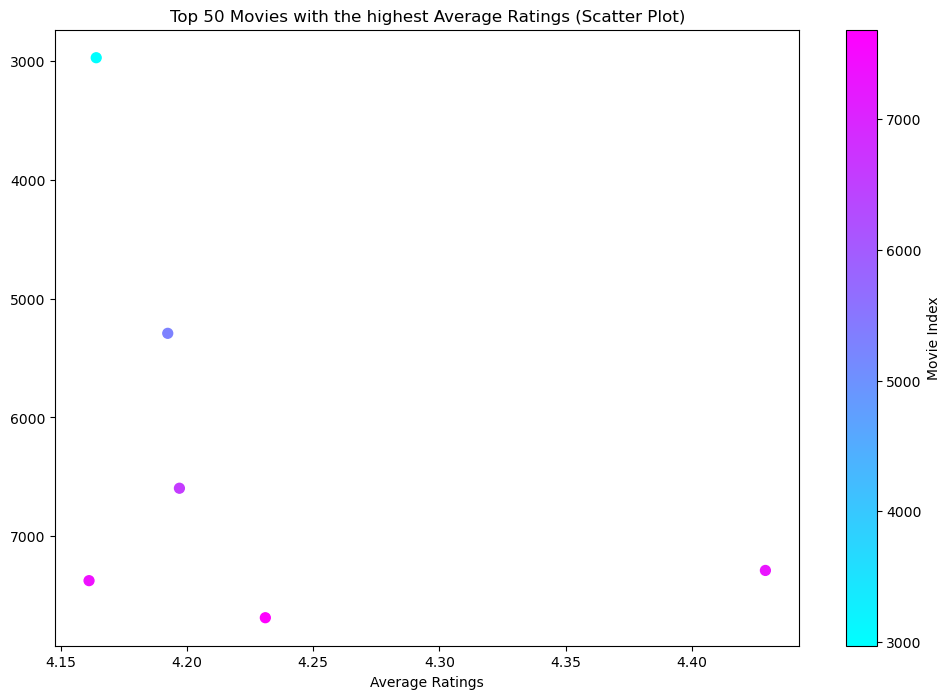

In [35]:
top_50_movies = popular_df.head(50)
plt.figure(figsize=(12,8))
scatter = plt.scatter(top_50_movies['avg_ratings'], top_50_movies.index, c=top_50_movies.index, cmap='cool', s=50)
plt.xlabel('Average Ratings')
plt.title('Top 50 Movies with the highest Average Ratings (Scatter Plot)')
plt.gca().invert_yaxis() 
plt.colorbar(label='Movie Index', orientation='vertical')
plt.show
